# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

import requests

### Generate the Cities List by Using the `citipy` Library

In [5]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:

    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 578


In [6]:
cities

['toliara',
 'jiangyou',
 'fenghua',
 'tiksi',
 'susuman',
 'sisimiut',
 'thompson',
 'oranjemund',
 'adamstown',
 'georgetown',
 'kemijarvi',
 'waitangi',
 'lihue',
 'shevchenko',
 'tezu',
 'hailar',
 'ta`u',
 'puerto natales',
 'edinburgh of the seven seas',
 'east london',
 'praia da vitoria',
 'siem reap',
 'la passe',
 'port-aux-francais',
 'ancud',
 'znamenskoye',
 'tommot',
 'mandla',
 'at-bashi',
 'uturoa',
 'blackmans bay',
 'klaksvik',
 'palmer',
 'ushuaia',
 'ust-nera',
 'srivardhan',
 'longyearbyen',
 'kihei',
 'margaret river',
 'papatowai',
 "nar'yan-mar",
 'alice springs',
 'saipan',
 'nguigmi',
 'gola bazar',
 'riberalta',
 'nicoya',
 'pajara',
 'sigli',
 'afaahiti',
 'hermanus',
 'pinsk',
 'keflavik',
 'grytviken',
 'kirensk',
 'kayangel',
 'hawaiian paradise park',
 'takoradi',
 'bilibino',
 'arraial do cabo',
 'cabo san lucas',
 'kerikeri',
 'lagonoy',
 'yellowknife',
 'porto empedocle',
 'cabedelo',
 'hami',
 'iqaluit',
 'odacho-oda',
 'bredasdorp',
 "st. john's",
 

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
# url = f'https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={APIkey}'# YOUR CODE HERE
url='https://api.openweathermap.org'
# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities[:10]):
#     print(city)
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city  
    city_url = f'{url}/geo/1.0/direct?q={city}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        
        # 获取city api 的返回值
        json_city=requests.get(city_url).json()[0]
#         print("json_city",json_city)
#         [{'name': "Saint-François-de-l'Île-d'Orléans",
#           'lat': 47.0018865,
#           'lon': -70.8129222,
#           'country': 'CA',
#           'state': 'Quebec'}]
        lat=json_city.get('lat')
        lon=json_city.get('lon')
#         print(lat,lon)
      
        weather_url=f'{url}/data/2.5/weather?lat={lat}&lon={lon}&appid={weather_api_key}'
#         print('weather_url',weather_url)
        city_weather = requests.get(weather_url)
        city_weather=city_weather.json()
#         print(city_weather)

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = lat # YOUR CODE HERE
        city_lng = lon # YOUR CODE HERE
        city_max_temp = city_weather['main']['temp_max']# YOUR CODE HERE
        city_humidity = city_weather['main']['humidity']# YOUR CODE HERE
        city_clouds = city_weather['clouds']['all']# YOUR CODE HERE
        city_wind = city_weather['wind']['speed']# YOUR CODE HERE
        city_country = json_city.get('country')# YOUR CODE HERE json_city.get('country')
        city_date = city_weather['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as err:
        print("City not found. Skipping...")
#         print(err)
    
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | toliara
Processing Record 2 of Set 1 | jiangyou
Processing Record 3 of Set 1 | fenghua
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | susuman
Processing Record 6 of Set 1 | sisimiut
Processing Record 7 of Set 1 | thompson
Processing Record 8 of Set 1 | oranjemund
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | georgetown
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
city_data

[{'City': 'toliara',
  'Lat': -23.354173,
  'Lng': 43.66966,
  'Max Temp': 295.84,
  'Humidity': 64,
  'Cloudiness': 11,
  'Wind Speed': 2.12,
  'Country': 'MG',
  'Date': 1692811366},
 {'City': 'jiangyou',
  'Lat': 31.9525495,
  'Lng': 104.9347205,
  'Max Temp': 295.3,
  'Humidity': 70,
  'Cloudiness': 70,
  'Wind Speed': 2.37,
  'Country': 'CN',
  'Date': 1692811367},
 {'City': 'fenghua',
  'Lat': 29.6574464,
  'Lng': 121.4015232,
  'Max Temp': 300.04,
  'Humidity': 89,
  'Cloudiness': 92,
  'Wind Speed': 1,
  'Country': 'CN',
  'Date': 1692811367},
 {'City': 'tiksi',
  'Lat': 71.636604,
  'Lng': 128.868546,
  'Max Temp': 275.09,
  'Humidity': 92,
  'Cloudiness': 44,
  'Wind Speed': 0.99,
  'Country': 'RU',
  'Date': 1692811368},
 {'City': 'susuman',
  'Lat': 62.779732,
  'Lng': 148.15361,
  'Max Temp': 278.47,
  'Humidity': 98,
  'Cloudiness': 100,
  'Wind Speed': 1.06,
  'Country': 'RU',
  'Date': 1692811369},
 {'City': 'sisimiut',
  'Lat': 66.9371906,
  'Lng': -53.6664816,
  'Max 

In [10]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          10
Lat           10
Lng           10
Max Temp      10
Humidity      10
Cloudiness    10
Wind Speed    10
Country       10
Date          10
dtype: int64

In [11]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,toliara,-23.354173,43.669660,295.84,64,11,2.12,MG,1692811366
1,jiangyou,31.952549,104.934720,295.30,70,70,2.37,CN,1692811367
2,fenghua,29.657446,121.401523,300.04,89,92,1.00,CN,1692811367
3,tiksi,71.636604,128.868546,275.09,92,44,0.99,RU,1692811368
4,susuman,62.779732,148.153610,278.47,98,100,1.06,RU,1692811369


In [12]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities2.csv", index_label="City_ID")

In [13]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

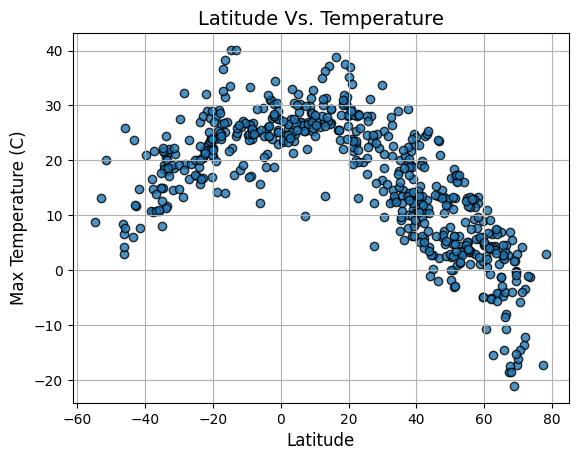

In [16]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE

plt.grid(axis='both')
plt.title('Latitude Vs. Temperature', fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)",fontsize=12)
# Save the figure
# plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

In [ ]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Max Temp"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)



# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(axis='both')
plt.title('Latitude Vs. ', fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Max Temperature (C)",fontsize=12)
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

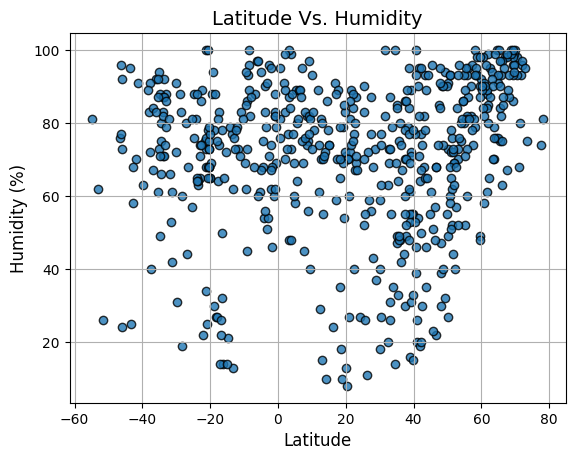

In [18]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Humidity"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(axis='both')
plt.title('Latitude Vs. Humidity', fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Humidity (%)",fontsize=12)
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

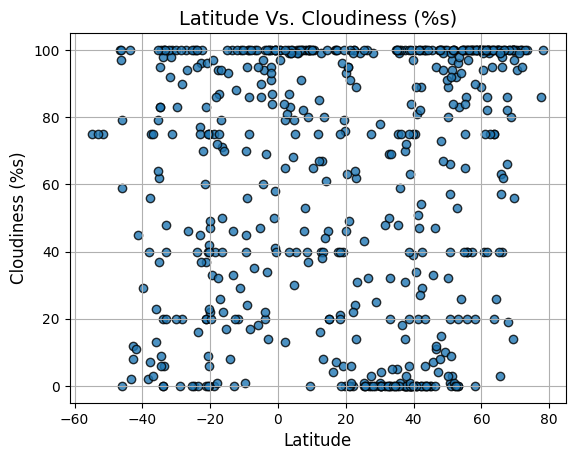

In [19]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Cloudiness"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(axis='both')
plt.title('Latitude Vs. Cloudiness (%s)', fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Cloudiness (%s)",fontsize=12)
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

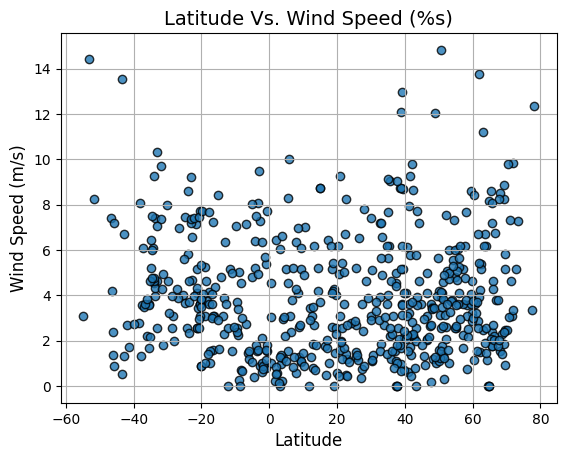

In [20]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(     
    city_data_df["Lat"],
    city_data_df["Wind Speed"],
    edgecolor="black",
    linewidths=1,
    marker="o", 
    alpha=0.8,
    label="Cities"
)
# Incorporate the other graph properties
# YOUR CODE HERE
plt.grid(axis='both')
plt.title('Latitude Vs. Wind Speed (%s)', fontsize=14)
plt.xlabel("Latitude", fontsize=12)
plt.ylabel("Wind Speed (m/s)",fontsize=12)
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [21]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

def plot_linear_regression(df,x,y,xtext,ytext):
    s, i ,r, p, std=linregress(df[x],df[y])
    y_pred=i + df[x]*s  # prediction
    
    plt.figure(figsize=(8,5))
    ax=plt.gca()

    df.plot(kind='scatter', x=x, y=y,ax=ax)
    plt.plot(df[x].values,y_pred, color='red')
    
    plt.text(x=xtext, y=ytext, string=f"y={s}*x+{i}")

    plt.grid(axis='both')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.show()


In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df=city_data_df[city_data_df['Lat']>0].copy()
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [23]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE

southern_hemi_df=city_data_df[city_data_df['Lat']<0].copy()
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

In [24]:

def plot_linear_regression(df,x,y,xtext,ytext,x_label,y_label):
    s, i ,r, p, std=linregress(df[x],df[y])
    y_pred=i + df[x]*s  # prediction
    print(f"The r-value is: {r}")
    
    plt.figure(figsize=(8,6))
    ax=plt.gca()

    df.plot(kind='scatter', x=x, y=y,ax=ax)
    
#     print(df[x].values)
#     print(y_pred)
    plt.plot(df[x].values,y_pred.values, color='red')
    
    plt.text(x=xtext, y=ytext, s="y={:0.2f}*x+{:0.2f}".format(s,i), color='red', fontsize=16)

    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.show()

The r-value is: -0.8462548186825364


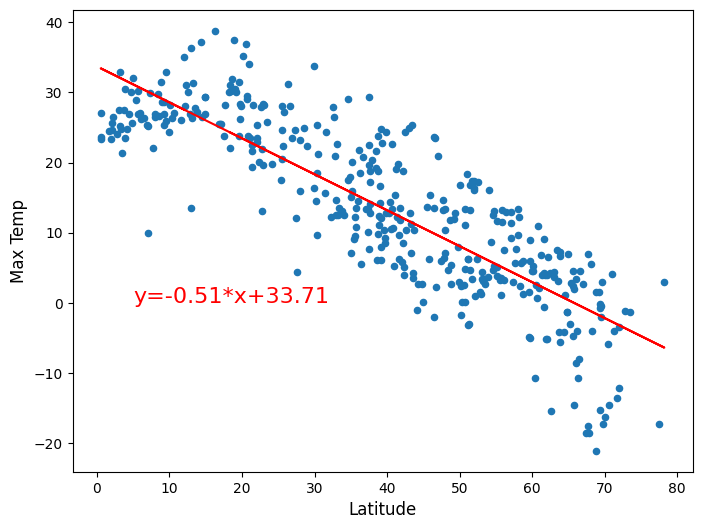

In [25]:
plot_linear_regression(df=northern_hemi_df,x='Lat',y='Max Temp',xtext=5,ytext=0,x_label='Latitude',y_label='Max Temp')

The r-value is: 0.6419546065421801


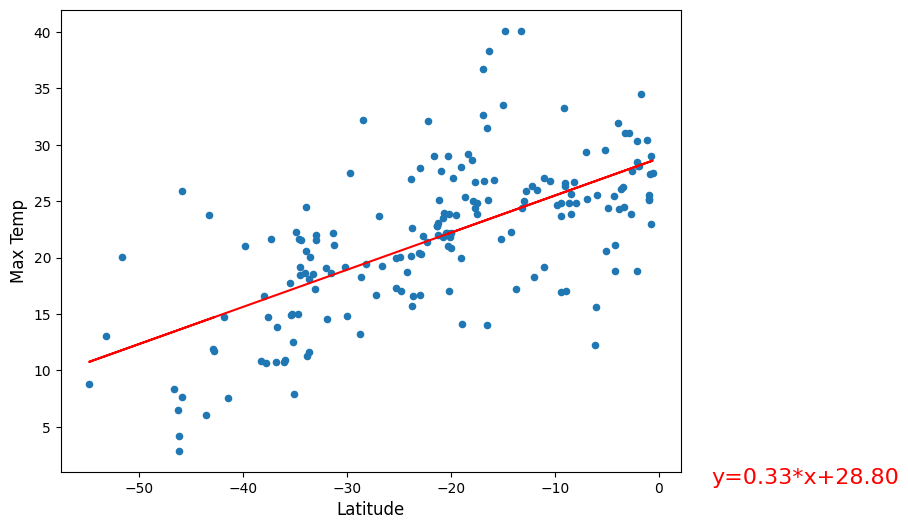

In [28]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=southern_hemi_df,x='Lat',y='Max Temp',xtext=5,ytext=0,x_label='Latitude',y_label='Max Temp')

The r-value is: 0.6419546065421801


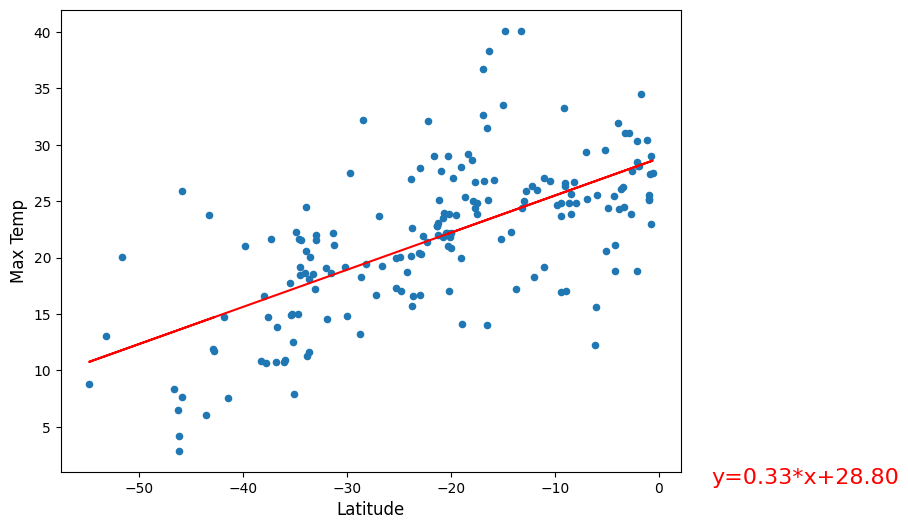

In [29]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=southern_hemi_df,x='Lat',y='Max Temp',xtext=5,ytext=0,x_label='Latitude',y_label='Max Temp')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.2385317912939407


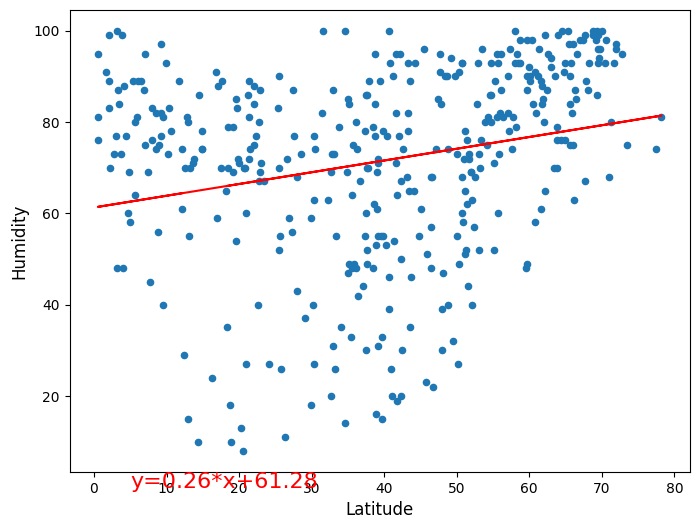

In [33]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=northern_hemi_df,x='Lat',y='Humidity',xtext=5,ytext=0,x_label='Latitude',y_label='Humidity')

The r-value is: 0.016759316950056818


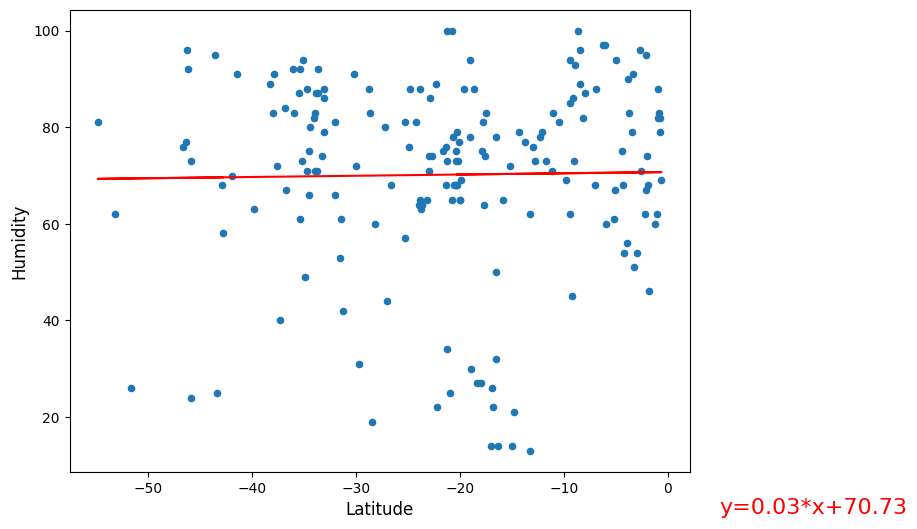

In [34]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=southern_hemi_df,x='Lat',y='Humidity',xtext=5,ytext=0,x_label='Latitude',y_label='Humidity')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.155004893876971


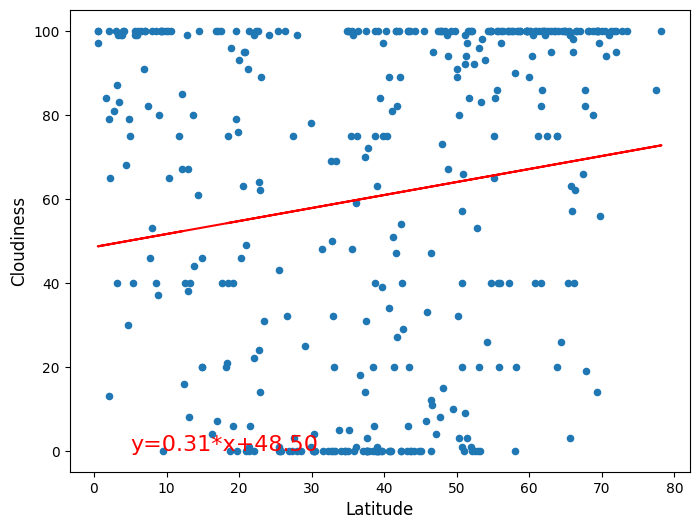

In [35]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=northern_hemi_df,x='Lat',y='Cloudiness',xtext=5,ytext=0,x_label='Latitude',y_label='Cloudiness')

The r-value is: 0.14341322916643243


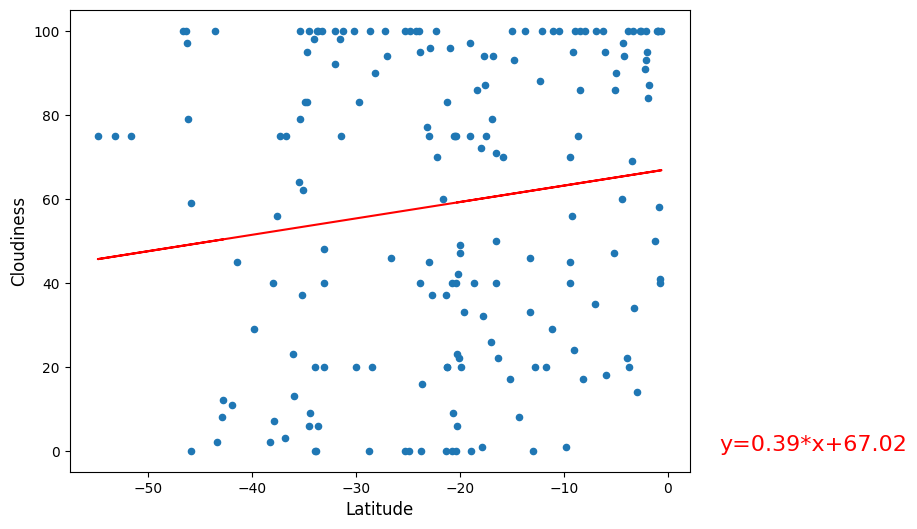

In [36]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=southern_hemi_df,x='Lat',y='Cloudiness',xtext=5,ytext=0,x_label='Latitude',y_label='Cloudiness')

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.1743466729090334


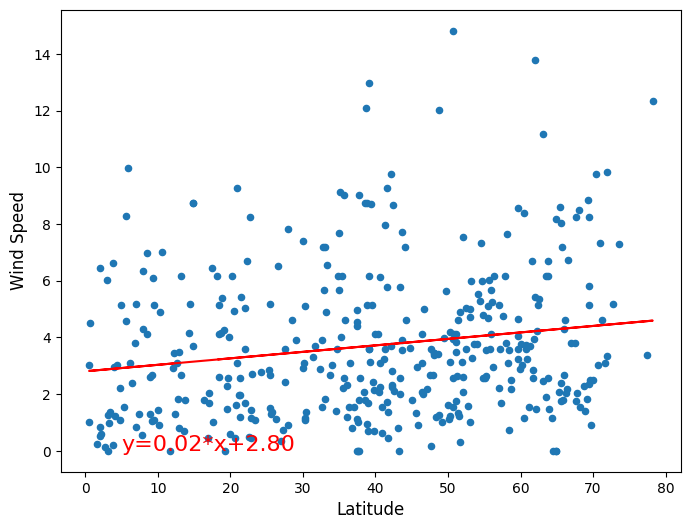

In [38]:
# Northern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=northern_hemi_df,x='Lat',y='Wind Speed',xtext=5,ytext=0,x_label='Latitude',y_label='Wind Speed')

The r-value is: -0.24947753546264592


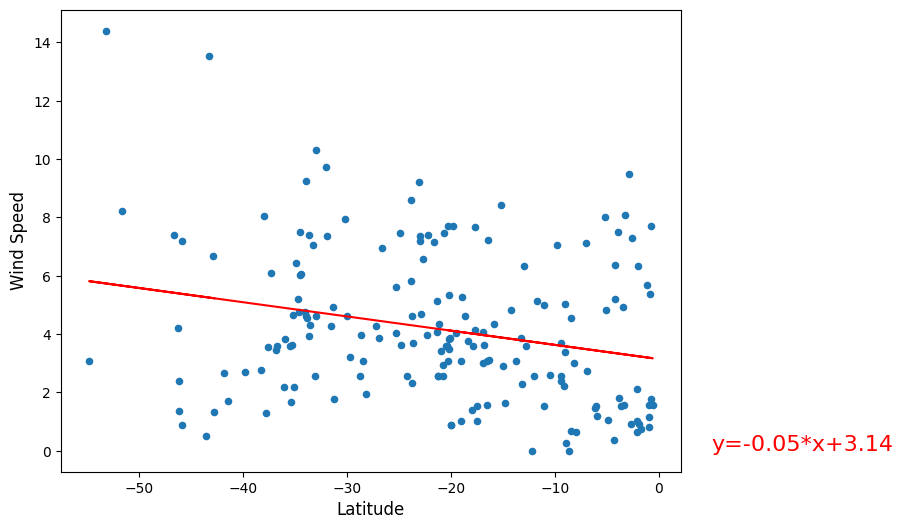

In [37]:
# Southern Hemisphere
# YOUR CODE HERE
plot_linear_regression(df=southern_hemi_df,x='Lat',y='Wind Speed',xtext=5,ytext=0,x_label='Latitude',y_label='Wind Speed')

**Discussion about the linear relationship:** YOUR RESPONSE HERE